In [162]:
import numpy as np
import matplotlib.pyplot as plt

In [163]:
C0 = 2
C1 = 0.1#0.2
C2 = 0#-0.1
C = [C0, C1, C2]
S1 = 0.2#0.2
S2 = 0
S = [0, S1, S2]
def B_theta(th, C, S):
    sum1 = C[0]/2
    for m in range(1, len(C)):
        print(m)
        sum1 = sum1 + C[m]*np.cos(m*th) + S[m]*np.sin(m*th)
    return sum1
    
thetav = np.linspace(0, 2*np.pi, 100)
Bv = B_theta(thetav, C, S)

    
    

1
2


<IPython.core.display.Javascript object>


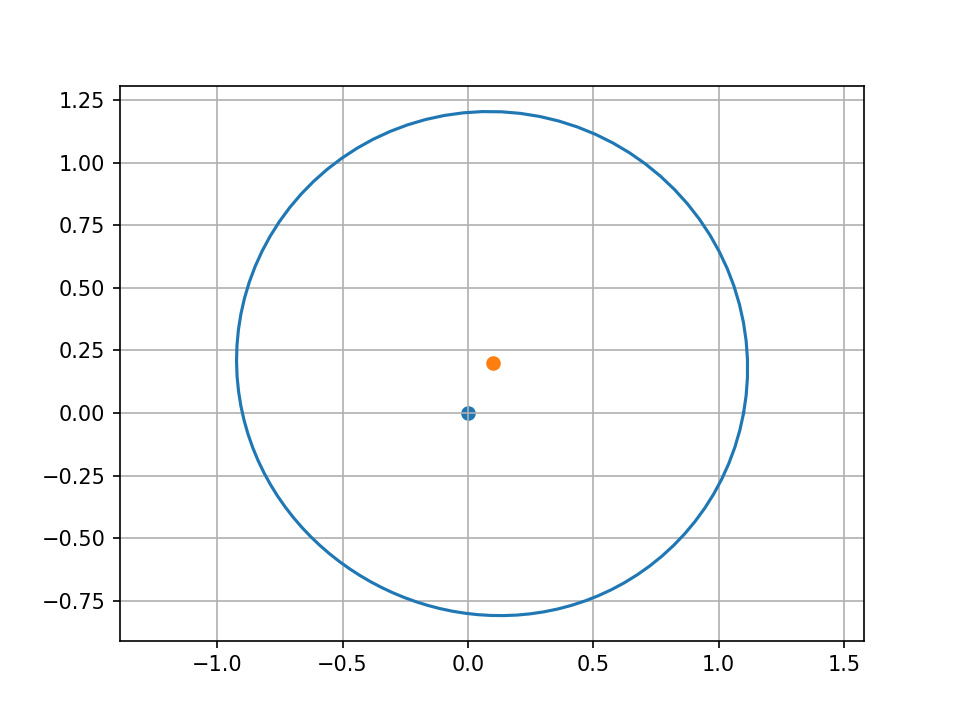

(-1.02520176571297, 1.2174521540125196, -0.908494839685172, 1.3037226751907969)

In [164]:
plt.plot(Bv*np.cos(thetav), Bv*np.sin(thetav))
plt.grid()
plt.scatter(0, 0, marker='o')
plt.scatter(2*C1/C0, 2*S1/C0, marker='o')
plt.axis('equal')

<IPython.core.display.Javascript object>


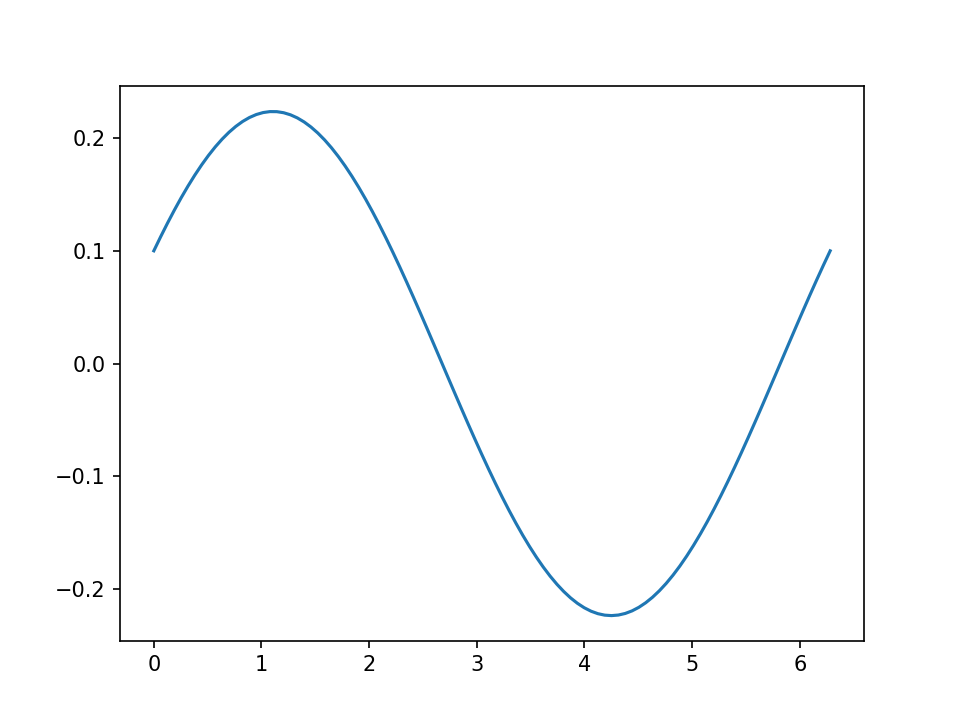

In [165]:
m = 1
plt.plot(thetav, C[m]*np.cos(m*thetav) + S[m]*np.sin(m*thetav))

<IPython.core.display.Javascript object>


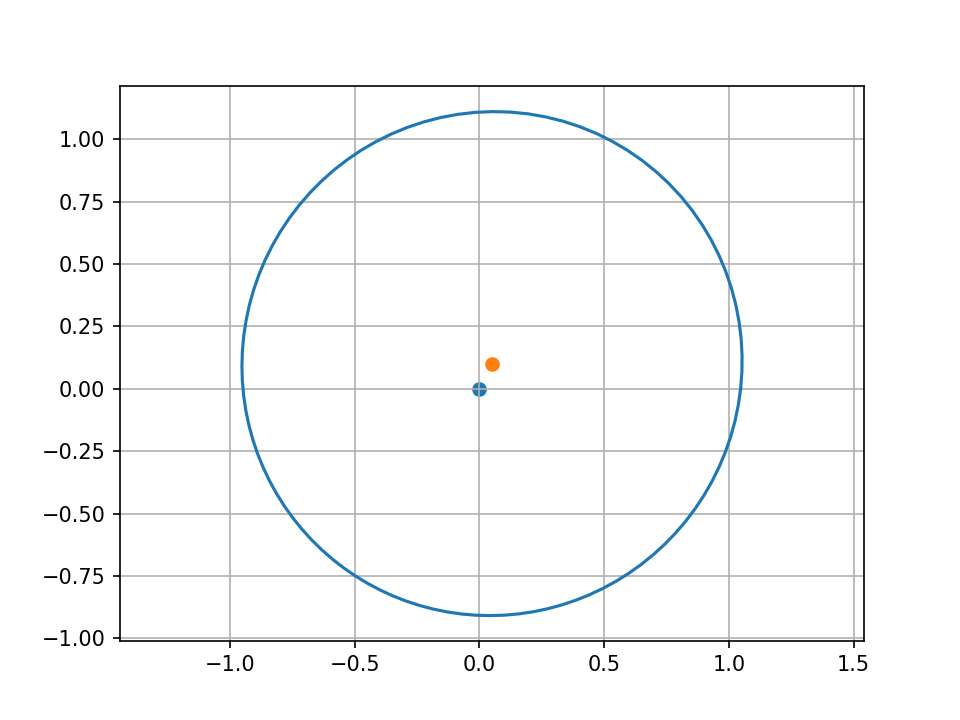

In [168]:
R = 1
dely = 0.1
delx = 0.05
mu0I_over_2pi = 1
def b2(theta):
    bot = np.sqrt((np.sin(theta) - dely/R)**2 + (np.cos(theta) - delx/R)**2)
    return mu0I_over_2pi/(R*bot)
b2v = b2(thetav)
plt.plot(b2v*np.cos(thetav), b2v*np.sin(thetav))
plt.axis('equal')
plt.grid()
plt.scatter(0, 0, marker='o')
plt.scatter(delx, dely, marker='o')

b_probe:  [1.04684785 1.05401103 1.06105835 1.06795011 1.07464544 1.08110259
 1.08727936 1.09313355 1.09862346 1.10370849 1.10834966 1.11251027
 1.11615644 1.11925775 1.12178777 1.12372456 1.12505106 1.1257555
 1.12583158 1.12527861 1.12410155 1.12231086 1.11992236 1.11695683
 1.11343967 1.10940039 1.10487208 1.09989081 1.09449506 1.08872511
 1.08262243 1.07622916 1.06958753 1.06273944 1.05572603 1.04858728
 1.04136177 1.03408636 1.02679609 1.01952399 1.01230098 1.00515589
 0.99811537 0.99120401 0.98444428 0.97785669 0.97145985 0.96527054
 0.95930386 0.95357331 0.94809093 0.94286739 0.93791212 0.93323343
 0.92883857 0.92473389 0.92092489 0.9174163  0.91421222 0.91131613
 0.90873096 0.90645921 0.90450293 0.90286381 0.90154319 0.90054213
 0.89986139 0.89950149 0.89946268 0.89974501 0.90034826 0.90127198
 0.90251547 0.90407774 0.90595752 0.90815322 0.91066286 0.91348408
 0.91661403 0.92004939 0.92378621 0.92781991 0.9321452  0.93675594
 0.94164509 0.94680463 0.95222539 0.95789703 0.963807

<IPython.core.display.Javascript object>


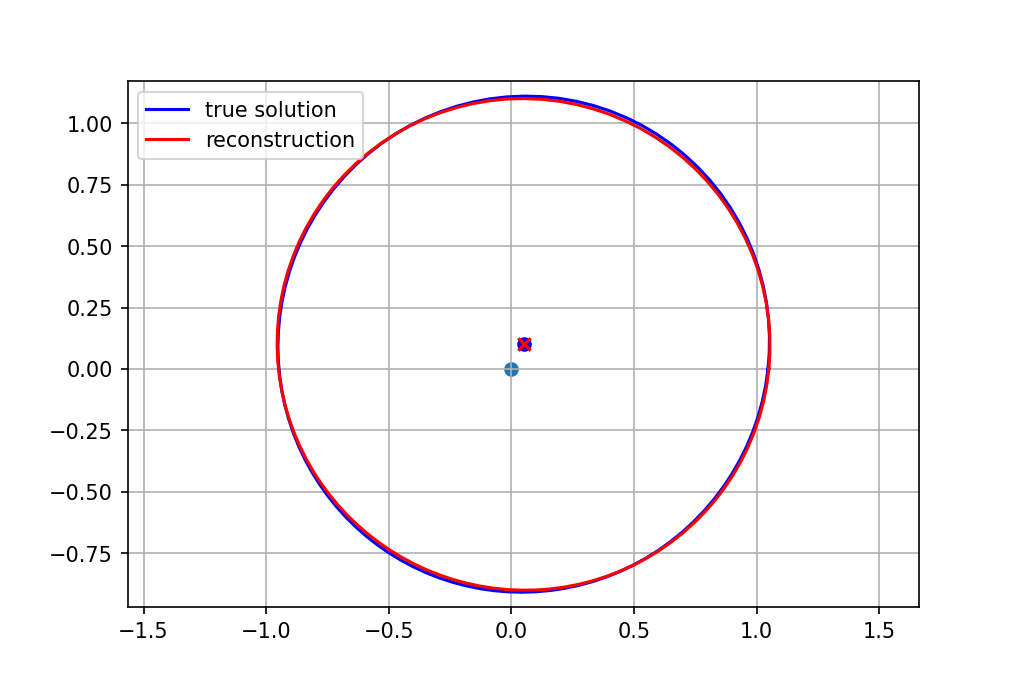

In [178]:
%matplotlib notebook
dth = 2*np.pi/100
th_p = [0, np.pi/2, np.pi, 3*np.pi/2]
th_p = np.arange(0, 2*np.pi, dth)
b_probe = np.array([])
for i in range(len(th_p)):
    b_probe = np.append(b_probe, b2(th_p[i]))
print('b_probe: ', b_probe)
def get_Cm(m, th_p, b_probe, dth):
    c1 = 0
    for i in range(len(th_p)):
        th = th_p[i]
        B_p = b_probe[i]
        c1 = c1 + B_p*np.cos(m*th)*dth
    return c1/np.pi

def get_Sm(m, th_p, b_probe, dth):
    s1 = 0
    for i in range(len(th_p)):
        th = th_p[i]
        B_p = b_probe[i]
        s1 = s1 + B_p*np.sin(m*th)*dth
    return s1/np.pi

c1 = get_Cm(1, th_p, b_probe, dth=dth)
s1 = get_Sm(1, th_p, b_probe, dth=dth)
print('c1: ', c1)
print('s1: ', s1)
print(s1)
C0 = 2
Cv = [C0, c1]
Sv = [0, s1]

    
thetav = np.linspace(0, 2*np.pi, 100)
Bv = B_theta(thetav, Cv, Sv)
plt.plot(b2v*np.cos(thetav), b2v*np.sin(thetav), label='true solution', color='blue')
plt.plot(Bv*np.cos(thetav), Bv*np.sin(thetav), label='reconstruction', color='red')
plt.grid()
plt.scatter(delx, dely, marker='o', color='blue')
plt.scatter(2*c1/C0, 2*s1/C0, marker='x', color='red')
plt.scatter(0, 0, marker='o')
plt.axis('equal')
plt.legend()

<IPython.core.display.Javascript object>


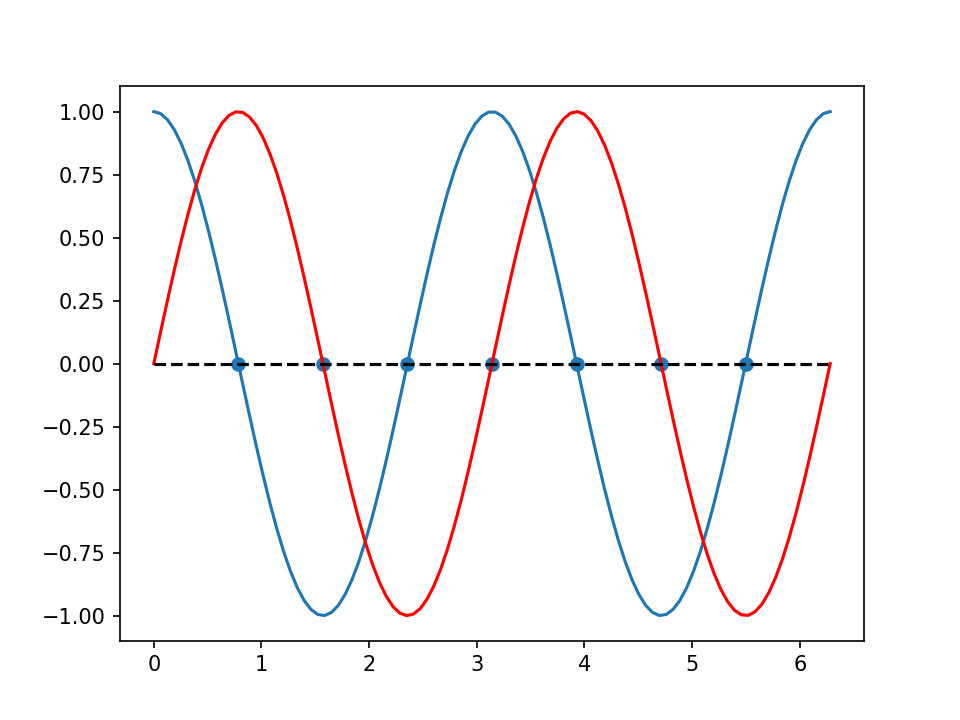

In [179]:
pi = np.pi
m = 2
plt.plot(thetav, np.cos(m*thetav))
plt.plot(thetav, np.sin(m*thetav), color='red')
plt.plot(thetav, 0*np.cos(2*thetav), 'k--')
plt.scatter([pi/4, pi/2, 3*pi/4, pi, 5*pi/4, 3*pi/2, 7*pi/4], 0*np.array([pi/4, pi/2, 3*pi/4, pi, 5*pi/4, 3*pi/2, 1]), marker='o')

<IPython.core.display.Javascript object>


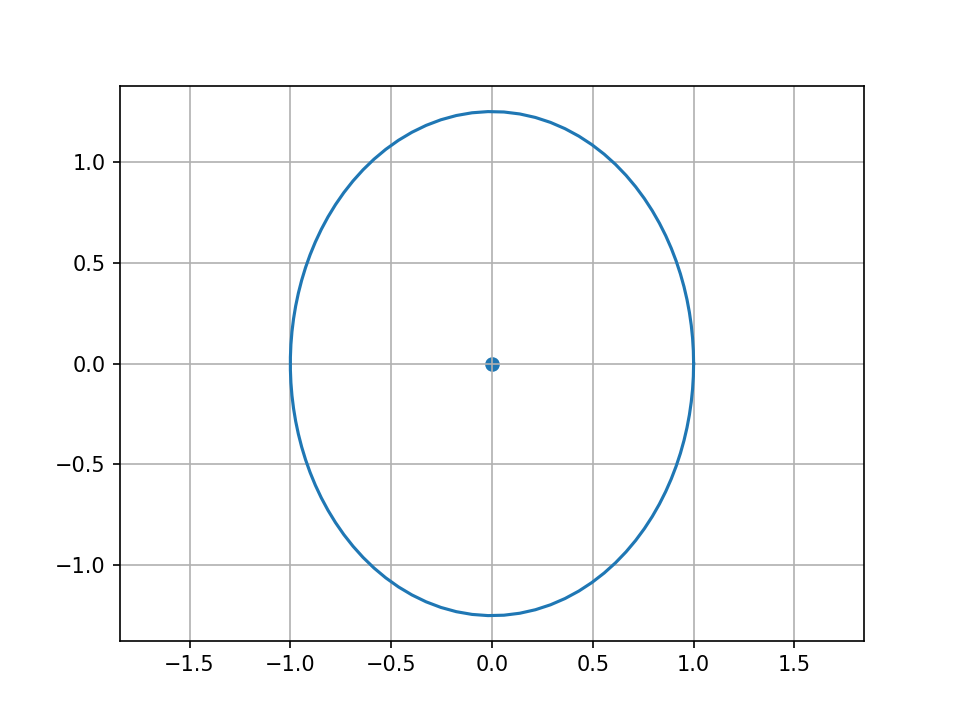

1.25


In [198]:
R = 1
mu0I_over_2pi = 1
def b3(theta):
    bot = np.sqrt((0.8*np.sin(theta))**2 + (np.cos(theta))**2)
    return mu0I_over_2pi/(R*bot)
b3v = b3(thetav)
plt.plot(b3v*np.cos(thetav), b3v*np.sin(thetav))
plt.axis('equal')
plt.grid()
plt.scatter(0, 0, marker='o')
print(b3(np.pi/2))


b_probe:  [1.         1.21772338 1.06866455 1.06866455 1.21772338]
c2:  -0.123938719254723
s2:  1.4135798584282297e-16
1
2


<IPython.core.display.Javascript object>


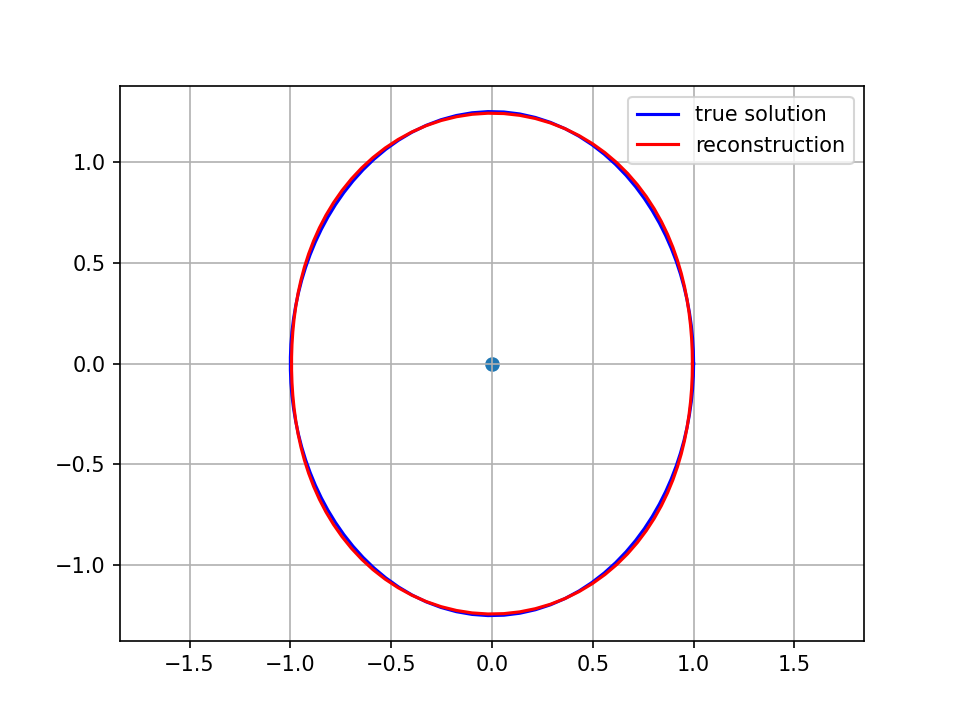

In [199]:
dth = 2*np.pi/5
th_p = [0, np.pi/2, np.pi, 3*np.pi/2]
th_p = np.arange(0, 2*np.pi, dth)
b_probe = np.array([])
for i in range(len(th_p)):
    b_probe = np.append(b_probe, b3(th_p[i]))
print('b_probe: ', b_probe)
c2 = get_Cm(2, th_p, b_probe, dth=dth)
s2 = get_Sm(2, th_p, b_probe, dth=dth)
print('c2: ', c2)
print('s2: ', s2)
C0 = 2*np.sqrt(b3(pi/2)*b3(0))
Cv = [C0, 0, c2]
Sv = [0, 0, s2]

    
thetav = np.linspace(0, 2*np.pi, 100)
Bv = B_theta(thetav, Cv, Sv)
plt.plot(b3v*np.cos(thetav), b3v*np.sin(thetav), label='true solution', color='blue')
plt.plot(Bv*np.cos(thetav), Bv*np.sin(thetav), label='reconstruction', color='red')
plt.grid()
#plt.scatter(delx, dely, marker='o', color='blue')
#plt.scatter(2*c1/C0, 2*s1/C0, marker='x', color='red')
plt.scatter(0, 0, marker='o')
plt.axis('equal')
plt.legend()

In [200]:
C0

2.23606797749979